In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing data set¶

In [84]:
df=pd.read_csv('bank_marketing.csv')

In [85]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [86]:
df.shape

(11162, 17)

In [87]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [88]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [89]:
#checking null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

No missing values

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [91]:
#getting proportion of values in target variable
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

Target column is balanced no much difference.it is a binary classification problemm

In [92]:
#checking the list of counts of target
df.nunique().to_frame("no of unique values")

,no of unique values
age,76
job,12
marital,3
education,4
default,2
balance,3805
housing,2
loan,2
contact,3
day,31


In [93]:
#seperating the numerical and categorical columns

#checking the Categorical columns
Categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] =="object": 
        Categorical_col.append(i)
 
print("Categorical columns:  ",Categorical_col)
print("\n")


Numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] !="object": 
        Numerical_col.append(i)
 
print("Numerical columns:  ",Numerical_col)
print("\n")


Categorical columns:   ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


Numerical columns:   ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']




In [94]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [95]:
df['marital'].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [96]:
df['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [97]:
df['housing'].value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

In [98]:
df['loan'].value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

# Encoding the categorical columns

In [99]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

le=LabelEncoder()
df["deposit"]=le.fit_transform(df["deposit"])
df.head()

In [100]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]= OE.fit_transform(df[i].values.reshape(-1,1))
df   

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0.0,1.0,1.0,0.0,2343,1.0,0.0,2.0,5,8.0,1042,1,-1,0,3.0,1.0
1,56,0.0,1.0,1.0,0.0,45,0.0,0.0,2.0,5,8.0,1467,1,-1,0,3.0,1.0
2,41,9.0,1.0,1.0,0.0,1270,1.0,0.0,2.0,5,8.0,1389,1,-1,0,3.0,1.0
3,55,7.0,1.0,1.0,0.0,2476,1.0,0.0,2.0,5,8.0,579,1,-1,0,3.0,1.0
4,54,0.0,1.0,2.0,0.0,184,0.0,0.0,2.0,5,8.0,673,2,-1,0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1.0,2.0,0.0,0.0,1,1.0,0.0,0.0,20,0.0,257,1,-1,0,3.0,0.0
11158,39,7.0,1.0,1.0,0.0,733,0.0,0.0,2.0,16,6.0,83,4,-1,0,3.0,0.0
11159,32,9.0,2.0,1.0,0.0,29,0.0,0.0,0.0,19,1.0,156,2,-1,0,3.0,0.0
11160,43,9.0,1.0,1.0,0.0,0,0.0,1.0,0.0,8,8.0,9,2,172,5,0.0,0.0


Detecting outliers

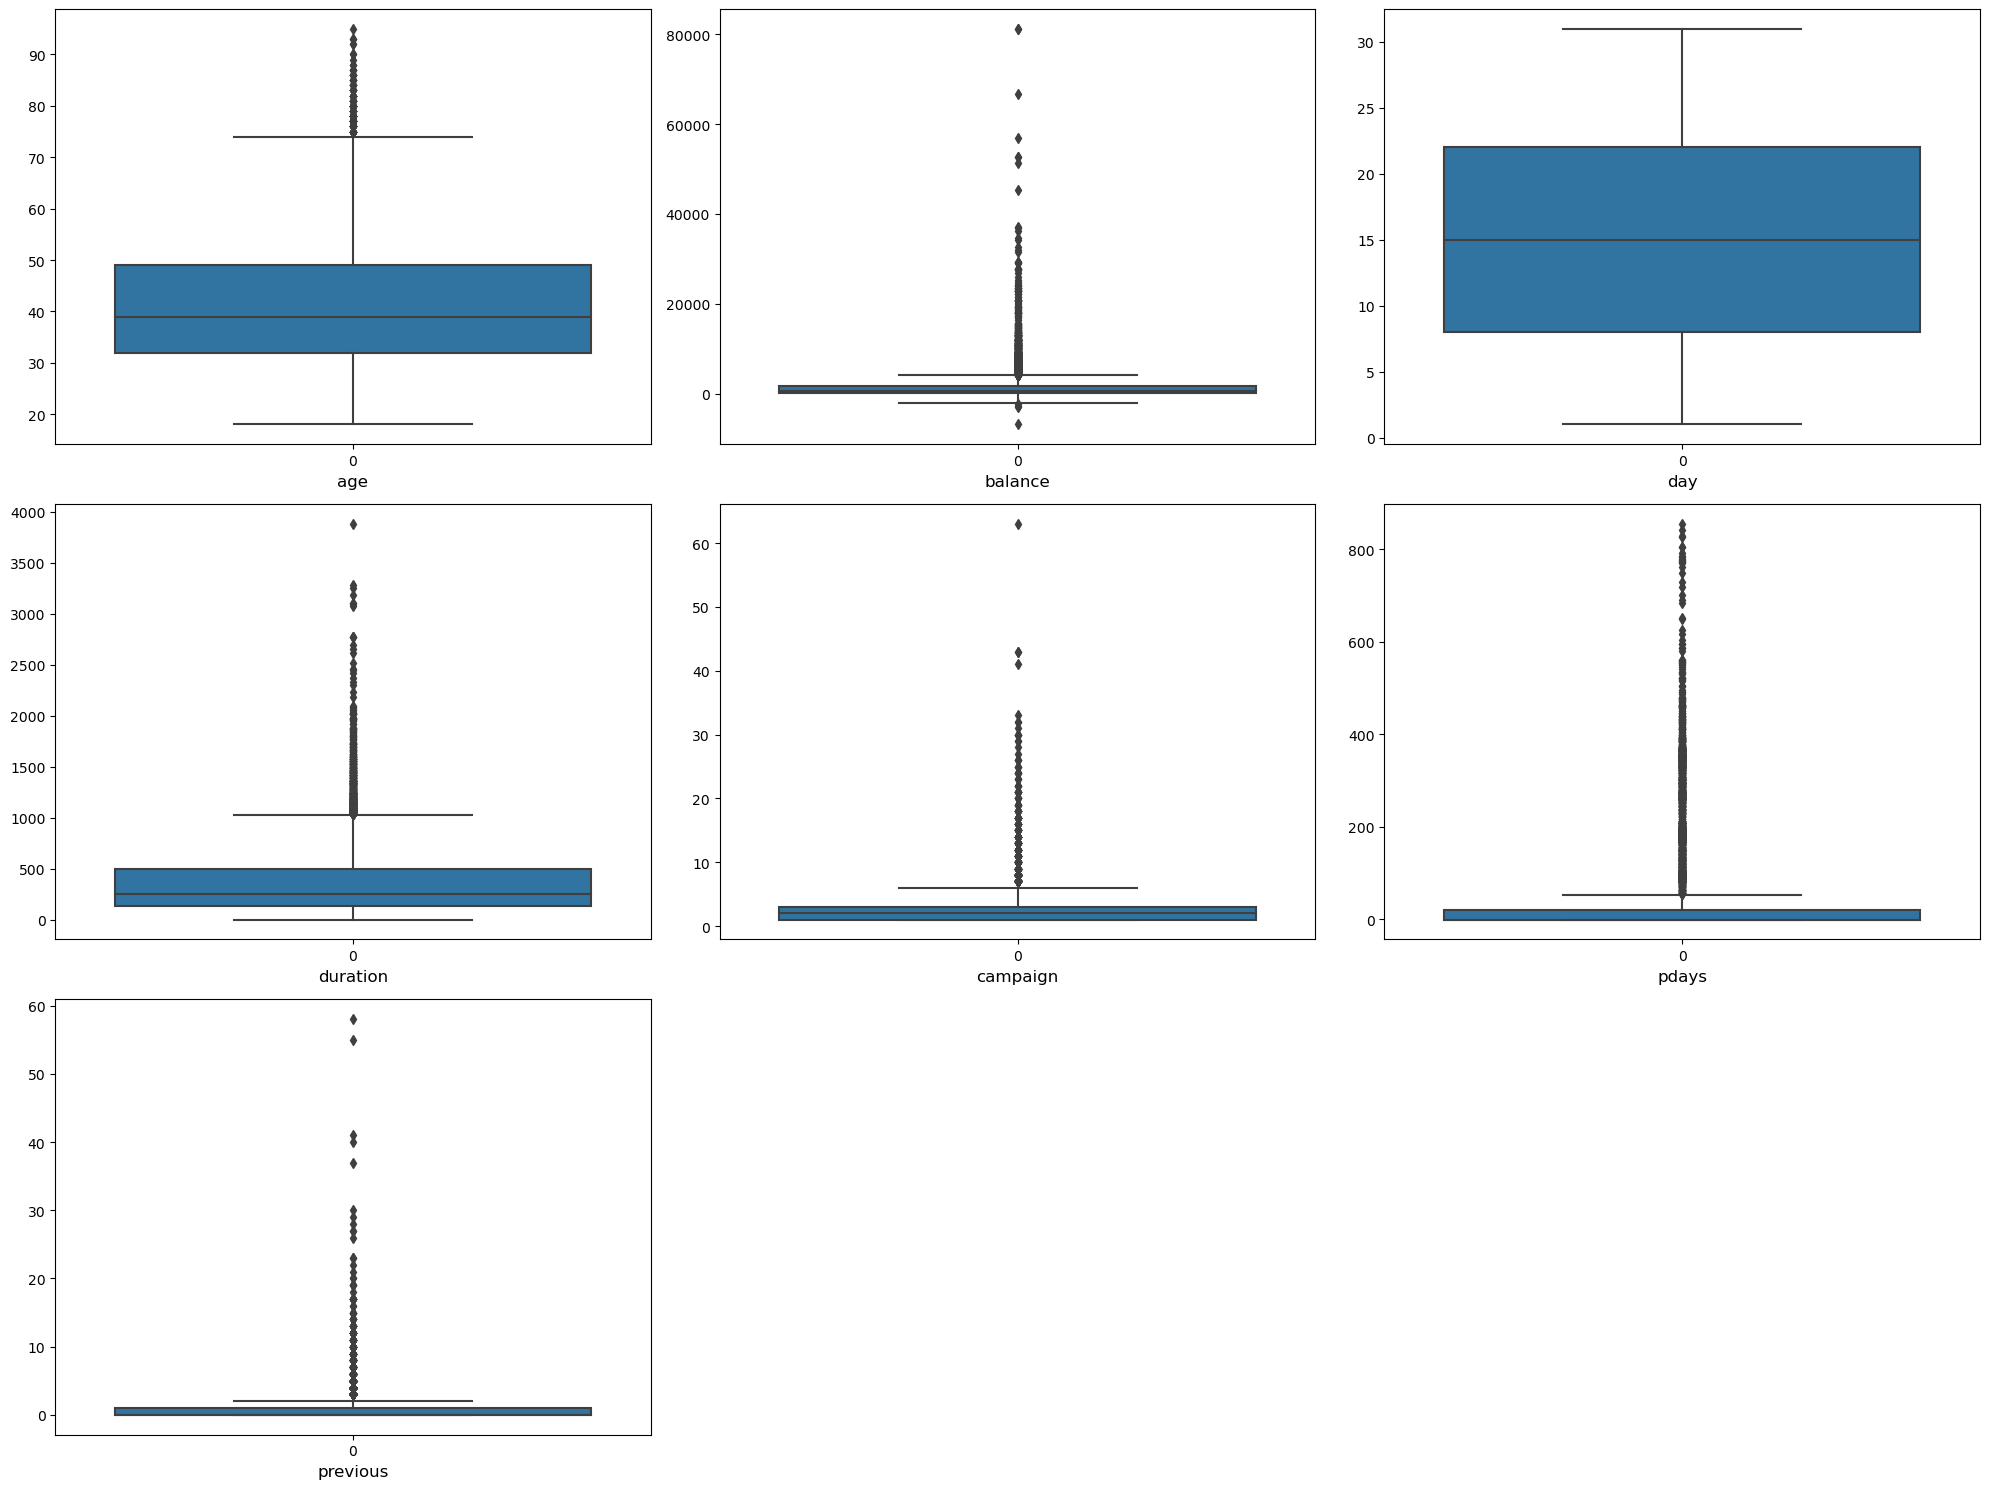

In [101]:
plt.figure(figsize=(20,15), facecolor= "white")
plotnumber = 1#iteration or index value
for col in Numerical_col:
    if plotnumber<=7:
        ax=plt.subplot(3,3, plotnumber)#subplot is used to plot diff plot on single image
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation= 0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

there ia s huge outliers in balance,age,duration,pdays and previous

In [102]:
from scipy.stats import zscore
out_col=df[['age','balance','duration','campaign','pdays','previous']]
z=np.abs(zscore(out_col))
z 

,age,balance,duration,campaign,pdays,previous
0,1.491505,0.252525,1.930226,0.554168,0.481184,0.363260
1,1.239676,0.459974,3.154612,0.554168,0.481184,0.363260
2,0.019470,0.080160,2.929901,0.554168,0.481184,0.363260
3,1.155733,0.293762,0.596366,0.554168,0.481184,0.363260
4,1.071790,0.416876,0.867171,0.186785,0.481184,0.363260
...,...,...,...,...,...,...
11157,0.691015,0.473616,0.331287,0.554168,0.481184,0.363260
11158,0.187357,0.246658,0.832564,0.547981,0.481184,0.363260
11159,0.774958,0.464934,0.622258,0.186785,0.481184,0.363260
11160,0.148416,0.473926,1.045752,0.186785,1.109571,1.818332


In [103]:
#threesold=3
np.where(z>3)

(array([    1,    11,    12, ..., 11054, 11074, 11140], dtype=int64),
 array([2, 2, 2, ..., 5, 3, 3], dtype=int64))

In [104]:
z.iloc[1,2]

3.1546116096227013

In [105]:
#removoing the dataabove zscore and creating new df
df1=df[(z<3).all(axis=1)]
df1.shape

(10098, 17)

In [106]:
#shape of old and new data
print("old data frame.--",df.shape[0])
print("new data frame.--",df1.shape[0])

old data frame.-- 11162
new data frame.-- 10098


In [107]:
print("data loss percentage--", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss percentage-- 9.53234187421609


the data loss is less than 10% we can delete the outliers

In [108]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0.0,1.0,1.0,0.0,2343,1.0,0.0,2.0,5,8.0,1042,1,-1,0,3.0,1.0
2,41,9.0,1.0,1.0,0.0,1270,1.0,0.0,2.0,5,8.0,1389,1,-1,0,3.0,1.0
3,55,7.0,1.0,1.0,0.0,2476,1.0,0.0,2.0,5,8.0,579,1,-1,0,3.0,1.0
4,54,0.0,1.0,2.0,0.0,184,0.0,0.0,2.0,5,8.0,673,2,-1,0,3.0,1.0
5,42,4.0,2.0,2.0,0.0,0,1.0,1.0,2.0,5,8.0,562,2,-1,0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1.0,2.0,0.0,0.0,1,1.0,0.0,0.0,20,0.0,257,1,-1,0,3.0,0.0
11158,39,7.0,1.0,1.0,0.0,733,0.0,0.0,2.0,16,6.0,83,4,-1,0,3.0,0.0
11159,32,9.0,2.0,1.0,0.0,29,0.0,0.0,0.0,19,1.0,156,2,-1,0,3.0,0.0
11160,43,9.0,1.0,1.0,0.0,0,0.0,1.0,0.0,8,8.0,9,2,172,5,0.0,0.0


In [109]:
df=df1

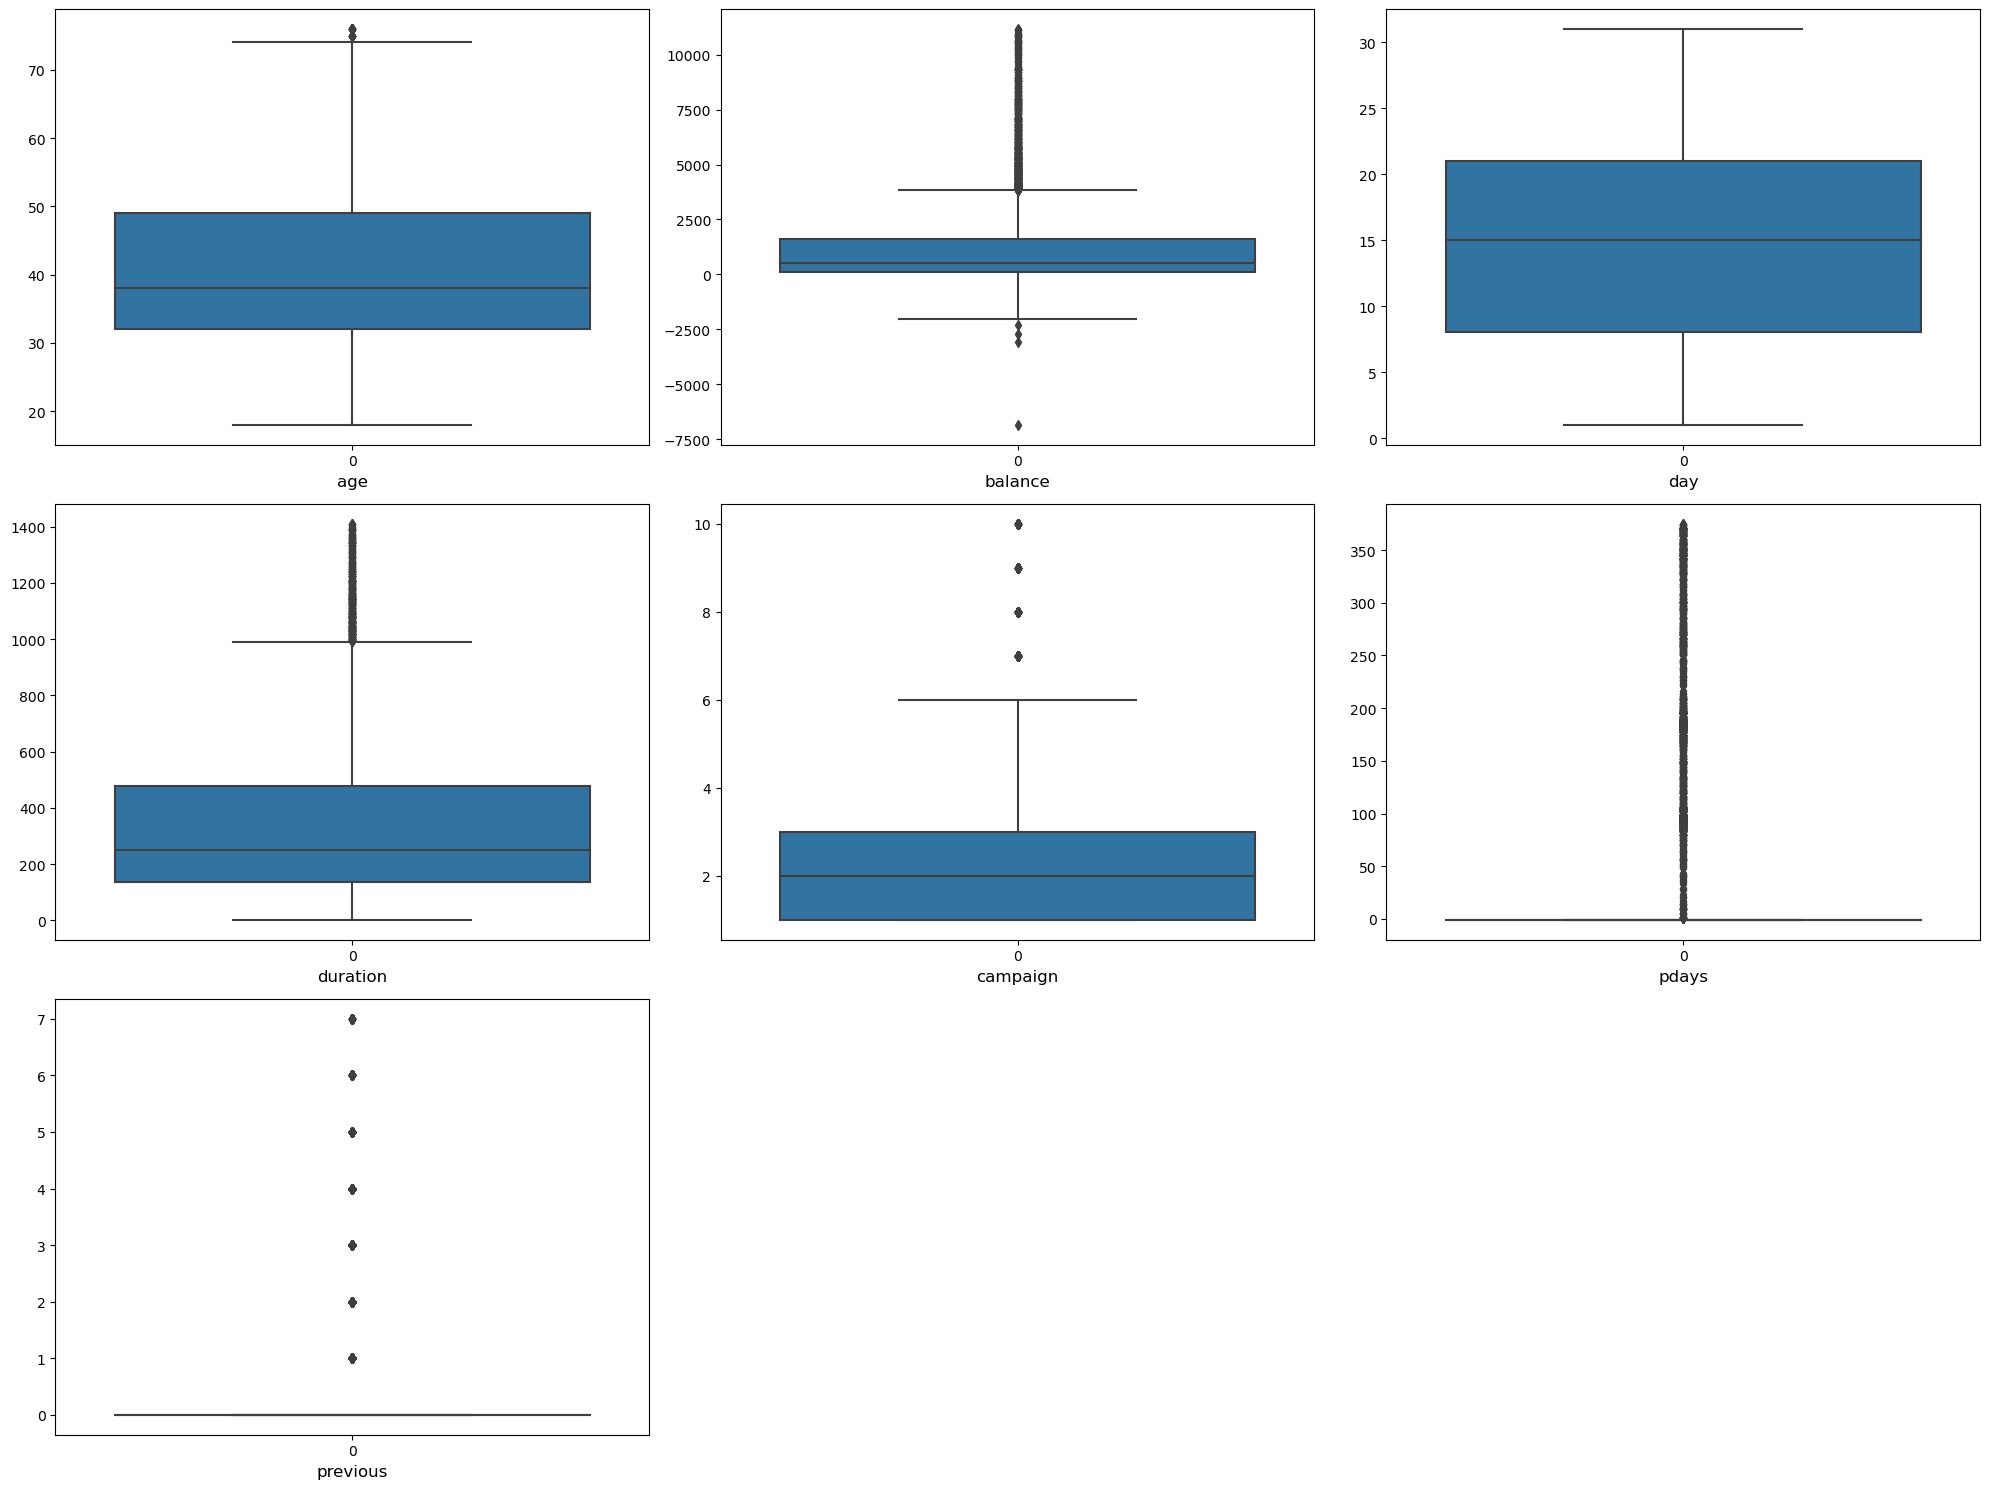

In [68]:
plt.figure(figsize=(20,15), facecolor= "white")
plotnumber = 1#iteration or index value
for col in Numerical_col:
    if plotnumber<=7:
        ax=plt.subplot(3,3, plotnumber)#subplot is used to plot diff plot on single image
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation= 0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

after deleting there is also huge outliers

In [110]:
#checking skewness
df.skew()

age          0.635180
job          0.196600
marital     -0.178487
education    0.116484
default      7.859059
balance      2.348644
housing      0.088831
loan         2.145550
contact      1.168726
day          0.129684
month       -0.355751
duration     1.353185
campaign     1.968647
pdays        2.131876
previous     2.634995
poutcome    -1.872409
deposit      0.176587
dtype: float64

In [111]:
#removing skewness using cuberoot method the acceptable range is -0.5 to +0.5
df["default"]=np.cbrt(df["default"])
df["balance"]=np.cbrt(df["balance"])
df["loan"]=np.cbrt(df["loan"])
df["contact"]=np.cbrt(df["contact"])
df["duration"]=np.cbrt(df["duration"])
df["campaign"]=np.cbrt(df["campaign"])
df["pdays"]=np.cbrt(df["pdays"])
df["previous"]=np.cbrt(df["previous"])
df["poutcome"]=np.cbrt(df["poutcome"])

In [112]:
df.skew()

age          0.635180
job          0.196600
marital     -0.178487
education    0.116484
default      7.859059
balance     -0.443416
housing      0.088831
loan         2.145550
contact      1.027850
day          0.129684
month       -0.355751
duration     0.282820
campaign     1.016455
pdays        1.382326
previous     1.470525
poutcome    -2.423715
deposit      0.176587
dtype: float64

the skweness was not reduced going to drop few columns

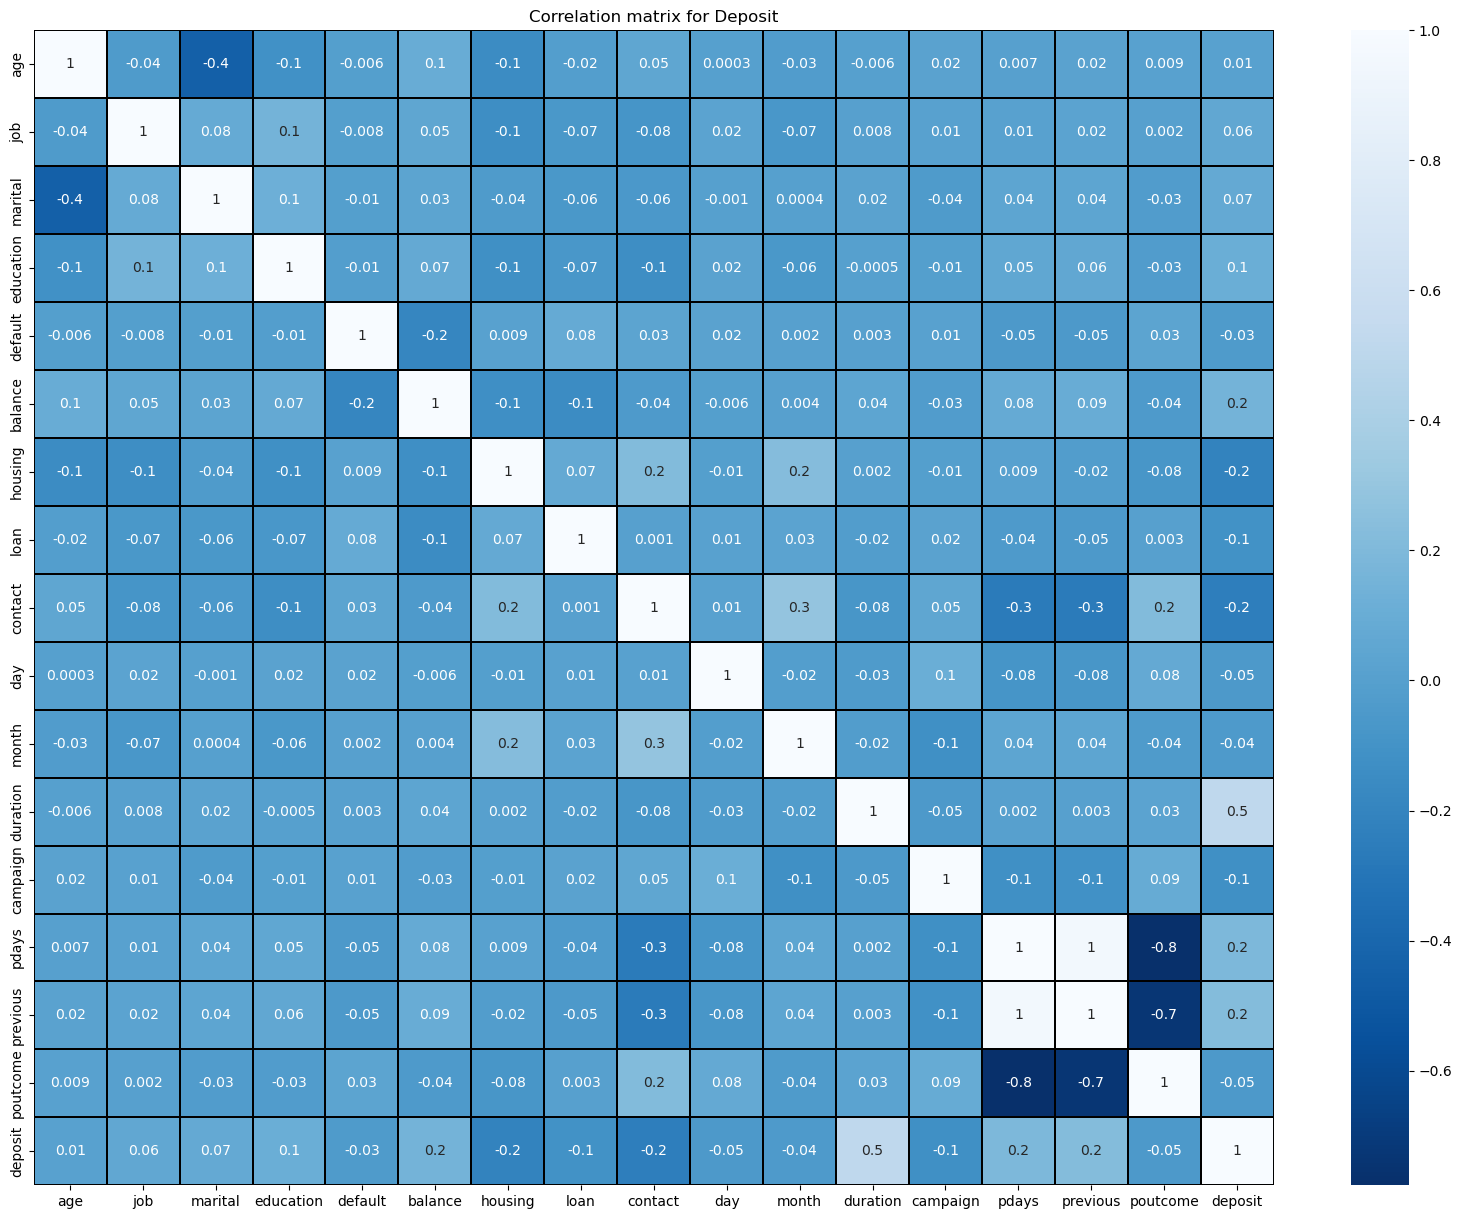

In [113]:
#by using heatmap checking the correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1,fmt='.1g', linecolor="black", annot=True, cmap="Blues_r")
plt.title("Correlation matrix for Deposit")
plt.show()

pdays,poutcome and previous are highly correlated

In [114]:
#check the corr
cor = df.corr()
cor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
age,1.000000,-0.040404,-0.448322,-0.115848,-0.006269,0.097751,-0.146966,-0.017519,0.048615,0.000327,-0.031020,-0.006122,0.020640,0.007024,0.016587,0.009290,0.011324
job,-0.040404,1.000000,0.081087,0.149552,-0.008470,0.047884,-0.137175,-0.066531,-0.084107,0.023931,-0.074723,0.007703,0.010874,0.010946,0.023367,0.002095,0.062380
marital,-0.448322,0.081087,1.000000,0.124196,-0.012475,0.033647,-0.039295,-0.064407,-0.060132,-0.001254,0.000447,0.016684,-0.039671,0.040382,0.042067,-0.028507,0.072413
education,-0.115848,0.149552,0.124196,1.000000,-0.014644,0.072675,-0.121092,-0.074295,-0.133770,0.018637,-0.063545,-0.000540,-0.012143,0.054120,0.061472,-0.028331,0.105405
default,-0.006269,-0.008470,-0.012475,-0.014644,1.000000,-0.188732,0.008778,0.077839,0.029589,0.018929,0.002247,0.003355,0.013580,-0.048061,-0.051146,0.033639,-0.034083
balance,0.097751,0.047884,0.033647,0.072675,-0.188732,1.000000,-0.125448,-0.149219,-0.044159,-0.006194,0.003731,0.037546,-0.033197,0.081913,0.092806,-0.043412,0.153198
housing,-0.146966,-0.137175,-0.039295,-0.121092,0.008778,-0.125448,1.000000,0.074474,0.214294,-0.012032,0.227375,0.001519,-0.011778,0.009177,-0.024473,-0.077933,-0.213892
loan,-0.017519,-0.066531,-0.064407,-0.074295,0.077839,-0.149219,0.074474,1.000000,0.001415,0.013251,0.025438,-0.024299,0.021557,-0.043376,-0.049659,0.002678,-0.108103
contact,0.048615,-0.084107,-0.060132,-0.133770,0.029589,-0.044159,0.214294,0.001415,1.000000,0.014443,0.289135,-0.080543,0.045986,-0.268425,-0.265264,0.209775,-0.246307
day,0.000327,0.023931,-0.001254,0.018637,0.018929,-0.006194,-0.012032,0.013251,0.014443,1.000000,-0.019262,-0.034967,0.108295,-0.083738,-0.079807,0.077097,-0.054273


In [115]:
#Seperating the label and features¶
x=df.drop('deposit', axis=1)
y=df["deposit"]

In [116]:
print(x)
print(y)

       age  job  marital  education  default    balance  housing  loan  \
0       59  0.0      1.0        1.0      0.0  13.281815      1.0   0.0   
2       41  9.0      1.0        1.0      0.0  10.829321      1.0   0.0   
3       55  7.0      1.0        1.0      0.0  13.528518      1.0   0.0   
4       54  0.0      1.0        2.0      0.0   5.687734      0.0   0.0   
5       42  4.0      2.0        2.0      0.0   0.000000      1.0   1.0   
...    ...  ...      ...        ...      ...        ...      ...   ...   
11157   33  1.0      2.0        0.0      0.0   1.000000      1.0   0.0   
11158   39  7.0      1.0        1.0      0.0   9.016431      0.0   0.0   
11159   32  9.0      2.0        1.0      0.0   3.072317      0.0   0.0   
11160   43  9.0      1.0        1.0      0.0   0.000000      0.0   1.0   
11161   34  9.0      1.0        1.0      0.0   0.000000      0.0   0.0   

        contact  day  month   duration  campaign     pdays  previous  poutcome  
0      1.259921    5    8.0  1

In [117]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.635561,-1.376762,-0.325083,-0.383673,-0.125264,0.906463,1.045395,-0.393844,1.709572,-1.254328,0.799026,1.914710,-0.898712,-0.539775,-0.534018,0.415465
1,0.025633,1.399736,-0.325083,-0.383673,-0.125264,0.498049,1.045395,-0.393844,1.709572,-1.254328,0.799026,2.455010,-0.898712,-0.539775,-0.534018,0.415465
2,1.277799,0.782736,-0.325083,-0.383673,-0.125264,0.947546,1.045395,-0.393844,1.709572,-1.254328,0.799026,0.958940,-0.898712,-0.539775,-0.534018,0.415465
3,1.188358,-1.376762,-0.325083,0.958784,-0.125264,-0.358180,-0.956577,-0.393844,1.709572,-1.254328,0.799026,1.186113,0.045210,-0.539775,-0.534018,0.415465
4,0.115073,-0.142763,1.273888,0.958784,-0.125264,-1.305360,1.045395,2.539075,1.709572,-1.254328,0.799026,0.915277,0.045210,-0.539775,-0.534018,0.415465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10093,-0.689891,-1.068262,1.273888,-1.726130,-0.125264,-1.138829,1.045395,-0.393844,-0.616186,0.530114,-1.719843,-0.088819,-0.898712,-0.539775,-0.534018,0.415465
10094,-0.153248,0.782736,-0.325083,-0.383673,-0.125264,0.196148,-0.956577,-0.393844,1.709572,0.054263,0.169309,-1.146593,1.234476,-0.539775,-0.534018,0.415465
10095,-0.779331,1.399736,1.273888,-0.383673,-0.125264,-0.793726,-0.956577,-0.393844,-0.616186,0.411151,-1.404984,-0.605385,0.045210,-0.539775,-0.534018,0.415465
10096,0.204514,1.399736,-0.325083,-0.383673,-0.125264,-1.305360,-0.956577,2.539075,-0.616186,-0.897440,0.799026,-2.356052,0.045210,1.802518,2.472493,-2.896701


In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.333092,age
1,1.049101,job
2,1.291717,marital
3,1.072982,education
4,1.042036,default
5,1.095861,balance
6,1.188581,housing
7,1.043023,loan
8,1.262938,contact
9,1.019937,day


In [78]:
x=df.drop('pdays', axis=1)

In [40]:
print(x)
print(y)

       age  job  marital  education  default    balance  housing  loan  \
0       59  0.0      1.0        1.0      0.0  13.281815      1.0   0.0   
2       41  9.0      1.0        1.0      0.0  10.829321      1.0   0.0   
3       55  7.0      1.0        1.0      0.0  13.528518      1.0   0.0   
4       54  0.0      1.0        2.0      0.0   5.687734      0.0   0.0   
5       42  4.0      2.0        2.0      0.0   0.000000      1.0   1.0   
...    ...  ...      ...        ...      ...        ...      ...   ...   
11157   33  1.0      2.0        0.0      0.0   1.000000      1.0   0.0   
11158   39  7.0      1.0        1.0      0.0   9.016431      0.0   0.0   
11159   32  9.0      2.0        1.0      0.0   3.072317      0.0   0.0   
11160   43  9.0      1.0        1.0      0.0   0.000000      0.0   1.0   
11161   34  9.0      1.0        1.0      0.0   0.000000      0.0   0.0   

        contact  day  month   duration  campaign  previous  poutcome  deposit  
0      1.259921    5    8.0  10

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,13.946718,age
1,2.992596,job
2,5.142057,marital
3,4.113592,education
4,1.057875,default
5,2.971655,balance
6,2.238884,housing
7,1.199837,loan
8,1.773807,contact
9,4.438517,day


DATA MODELLING

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, roc_auc_score,recall_score ,classification_report, f1_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=2)

In [121]:
models={"LogisticRegression":LogisticRegression(),
         "AdaBoostClassifier":AdaBoostClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier(),"BaggingClassifier":BaggingClassifier(),
           "RandomForestClassifier":RandomForestClassifier(),
             "support vector mach":SVC(),"Decision tree classifier":DecisionTreeClassifier()
       }
                                
for i in range(len(list(models))):
       model= list(models.values())[i]
       model.fit(x_train,y_train)#train model
        
        # making predictions
       y_train_pred = model.predict(x_train)
       y_test_pred =model.predict(x_test)
        
        
        #Training set performance
       model_train_accuracy = accuracy_score(y_train,y_train_pred)
       model_train_f1    =   f1_score(y_train,y_train_pred)
       model_train_precision = precision_score(y_train,y_train_pred)
       model_train_recall =   recall_score(y_train,y_train_pred)
       model_train_roauc_score= roc_auc_score(y_train,y_train_pred)    
       #model_train_classification_report= classification_report(y_train,y_train_pred) 
                                        
                                        
          #Test set performance
       model_test_accuracy = accuracy_score(y_test,y_test_pred)
       model_test_f1    =   f1_score(y_test,y_test_pred)
       model_test_precision = precision_score(y_test,y_test_pred)
       model_test_recall =   recall_score(y_test,y_test_pred)
       model_test_roauc_score= roc_auc_score(y_test,y_test_pred)    
       #model_test_classification_report= classification_report(y_train,y_train_pred)   
        
                                         
       print(list(models.keys())[i]) 
                                        
                                        
       print("Model performance for Training set")
       print("-- Accuracy: {:.4f}".format(model_train_accuracy))       
       print("-- F1: {:.4f}".format(model_train_f1))                                 
       print("-- Precision: {:.4f}".format(model_train_precision))                                 
       print("-- Recalll: {:.4f}".format(model_train_recall))                                 
      
                                     
                                     
                                        
                                        
       print("Model performance for Test set")
       print("-- Accuracy: {:.4f}".format(model_test_accuracy))       
       print("-- F1: {:.4f}".format(model_test_f1))                                 
       print("-- Precision: {:.4f}".format(model_test_precision))                                 
       print("-- Recalll: {:.4f}".format(model_test_recall))                                 
       
                                        
       print('-'*30) 
       print("\n")   
                                        

LogisticRegression
Model performance for Training set
-- Accuracy: 0.8027
-- F1: 0.7816
-- Precision: 0.7876
-- Recalll: 0.7757
Model performance for Test set
-- Accuracy: 0.7976
-- F1: 0.7758
-- Precision: 0.7893
-- Recalll: 0.7627
------------------------------


AdaBoostClassifier
Model performance for Training set
-- Accuracy: 0.8311
-- F1: 0.8108
-- Precision: 0.8270
-- Recalll: 0.7951
Model performance for Test set
-- Accuracy: 0.8174
-- F1: 0.7968
-- Precision: 0.8144
-- Recalll: 0.7800
------------------------------


GradientBoostingClassifier
Model performance for Training set
-- Accuracy: 0.8607
-- F1: 0.8501
-- Precision: 0.8329
-- Recalll: 0.8680
Model performance for Test set
-- Accuracy: 0.8392
-- F1: 0.8269
-- Precision: 0.8172
-- Recalll: 0.8369
------------------------------


BaggingClassifier
Model performance for Training set
-- Accuracy: 0.9889
-- F1: 0.9878
-- Precision: 0.9909
-- Recalll: 0.9846
Model performance for Test set
-- Accuracy: 0.8218
-- F1: 0.8031
--

In [122]:
models=[LogisticRegression(),AdaBoostClassifier(),GradientBoostingClassifier(),SVC(),BaggingClassifier(),RandomForestClassifier(),DecisionTreeClassifier()]

In [123]:
def compare_models_cross_validation():
    
    for model in models:
        
        cv_score = cross_val_score(model, x, y, cv=5)
        mean_accuracy = sum(cv_score)/len(cv_score)
        mean_accuracy = mean_accuracy*100
        
        
        print('Cross Validation Score for the', model, '=', cv_score)
        print('Mean Accuracy  of the', model, '=', mean_accuracy,'%')
        print('-'*30) 
        print("\n") 

In [124]:
compare_models_cross_validation()

Cross Validation Score for the LogisticRegression() = [0.75346535 0.75643564 0.77970297 0.81921743 0.78553739]
Mean Accuracy  of the LogisticRegression() = 77.88717579038735 %
------------------------------


Cross Validation Score for the AdaBoostClassifier() = [0.71237624 0.76584158 0.79158416 0.82714215 0.80633977]
Mean Accuracy  of the AdaBoostClassifier() = 78.06567803882913 %
------------------------------


Cross Validation Score for the GradientBoostingClassifier() = [0.8        0.77277228 0.80594059 0.84447746 0.83308569]
Mean Accuracy  of the GradientBoostingClassifier() = 81.12552042722847 %
------------------------------


Cross Validation Score for the SVC() = [0.73019802 0.75990099 0.80643564 0.82417038 0.80782566]
Mean Accuracy  of the SVC() = 78.57061382215488 %
------------------------------


Cross Validation Score for the BaggingClassifier() = [0.74752475 0.74257426 0.81287129 0.8226845  0.81773155]
Mean Accuracy  of the BaggingClassifier() = 78.86772689155987 %
----

Model selection

THE LOWEST SCORE DIFFERENCE BETWEEN THE MODEL AND CROSS VALIDATION SCORE IS THE BEST MODEL

In [125]:
#difference between models and cross validation score
print("Diff between Accuracy score and cross_validation score  for logistic regression is =",  79.76 -77.88)
print("Diff between Accuracy score and cross_validation score  for AdaBoostClassifier is =",   81.78 -78.06)
print("Diff between Accuracy score and cross_validation score  for GradientBoostingClassifier is =",  83.92 -81.12)
print("Diff between Accuracy score and cross_validation score  for BaggingClassifier is =",  82.18 -78.86)
print("Diff between Accuracy score and cross_validation score  for RandomForestClassifier is =",  83.96-80.67)
print("Diff between Accuracy score and cross_validation score  for DecisionTreeClassifier is =", 77.39 -74.19)
print("Diff between Accuracy score and cross_validation score  for support vector machine is =", 81.39-78.57)

Diff between Accuracy score and cross_validation score  for logistic regression is = 1.8800000000000097
Diff between Accuracy score and cross_validation score  for AdaBoostClassifier is = 3.719999999999999
Diff between Accuracy score and cross_validation score  for GradientBoostingClassifier is = 2.799999999999997
Diff between Accuracy score and cross_validation score  for BaggingClassifier is = 3.3200000000000074
Diff between Accuracy score and cross_validation score  for RandomForestClassifier is = 3.289999999999992
Diff between Accuracy score and cross_validation score  for DecisionTreeClassifier is = 3.200000000000003
Diff between Accuracy score and cross_validation score  for support vector machine is = 2.8200000000000074


logistic regression is the best model

HYPER PARAMETER TUNING-

In [126]:
from sklearn.model_selection import RandomizedSearchCV

parameters ={'penalty':['l1', 'l2'],
             'dual':['bool', 'false'],
             'fit_intercept':['bool','True'],
             'intercept_scaling' : ['float',1],
             'class_weight':['dict','balanced'],
             'max_iter':[50,100],
             'C' :[0.10,1.0],
             'random_state':['int',None]
             }

In [127]:
lgv=LogisticRegression()

In [128]:
lgv.fit(x_train,y_train)

LogisticRegression()

In [129]:
lgv.best_params_

AttributeError: 'LogisticRegression' object has no attribute 'best_params_'

In [133]:
final_model=LogisticRegression()
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc= accuracy_score(y_test,pred)
print(acc*100)

79.76237623762377


PLOTTING ROC AND compare AUC FOR ALL MODELS

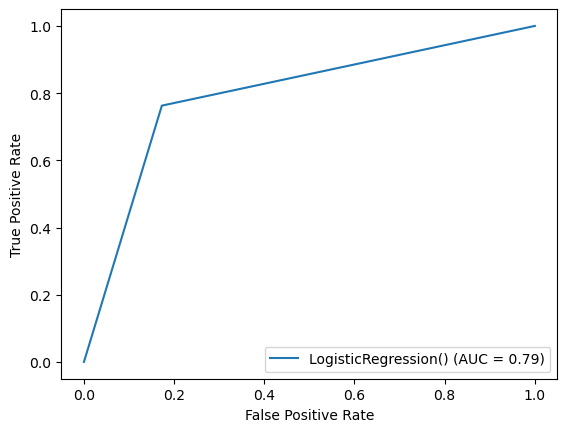

In [134]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn import metrics
fpr,tpr, thresholds=metrics.roc_curve(y_test, pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=final_model)
display.plot()

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 95%

In [135]:
#saving model using .pkl
import joblib
joblib.dump(final_model,"bank.pre.pkl")

['bank.pre.pkl']